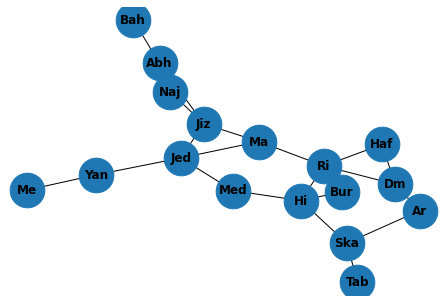



The destination Set of all cities:

{'Ri': None, 'Dm': 'Ri', 'Hi': 'Bur', 'Ar': 'Ska', 'Haf': 'Ri', 'Ma': 'Ri', 'Bur': 'Ri', 'Ska': 'Hi', 'Tab': 'Ska', 'Jiz': 'Ma', 'Jed': 'Ma', 'Naj': 'Jiz', 'Abh': 'Jiz', 'Yan': 'Jed', 'Med': 'Hi', 'Bah': 'Abh', 'Me': 'Yan'}


The shortest cost from the source to each city:

{'Ri': 0, 'Dm': 257, 'Hi': 386, 'Ar': 729, 'Haf': 199, 'Ma': 543, 'Bur': 220, 'Ska': 628, 'Tab': 920, 'Jiz': 1001, 'Jed': 629, 'Naj': 1323, 'Abh': 1125, 'Yan': 837, 'Med': 680, 'Bah': 1334, 'Me': 987}


In [1]:
# import the needed libriries

import networkx as nx                 # draw the graph
import matplotlib.pyplot as plt       # show the graph
import sys                            # use maxsize function that returns  
                                      # the maximum integer value a variable can take 

G = nx.Graph() #create a graph
G.add_nodes_from(['Ri', 'Dm', 'Hi', 'Ar', 'Haf', 'Ma', 'Bur', 'Ska', 'Tab'
, 'Jiz', 'Jed', 'Naj', 'Abh', 'Yan', 'Med', 'Bah']) #add multiple nodes


# adding edges
G.add_edge('Ri', 'Ma', weight=543)
G.add_edge('Dm', 'Ar', weight=645)
G.add_edge('Dm', 'Haf', weight=94)
G.add_edge('Dm', 'Ri', weight=257)
G.add_edge('Hi', 'Ri', weight=390)
G.add_edge('Hi', 'Bur', weight=166)
G.add_edge('Hi', 'Med', weight=294)
G.add_edge('Haf', 'Ri', weight=199)
G.add_edge('Ma', 'Jed', weight=86)
G.add_edge('Ma', 'Jiz', weight=458)
G.add_edge('Bur', 'Ri', weight=220)
G.add_edge('Jed', 'Med', weight=255)
G.add_edge('Jed', 'Yan', weight=208)
G.add_edge('Jed', 'Jiz', weight=448)
G.add_edge('Jiz', 'Abh', weight=124)
G.add_edge('Jiz', 'Naj', weight=322)
G.add_edge('Bah', 'Abh', weight=209)
G.add_edge('Abh', 'Naj', weight=204)
G.add_edge('Tab', 'Ska', weight=292)
G.add_edge('Ska', 'Ar', weight=101)
G.add_edge('Ska', 'Hi', weight=242)
G.add_edge('Me', 'Yan', weight=150)
nx.draw(G, with_labels=True, font_weight='bold', node_size=1200)
plt.show()


# define the source, city, and destination

source = 'Ri'
city = {}
destination = {}


# build a min heap priority queue to get 
# the minimum distance
# vertex from set of not yet visitid vertices

def main():

    def build_min_heap(A):
        heap_size = len(A)
        for i in range(heap_size // 2, -1, -1):
            min_heapify(A, heap_size, i)

    def min_heapify(A, heap_size, i):
        l = 2*i + 1
        r = (2*i) + 2

        smallest = None
        if l < heap_size and A[l][1] < A[i][1]:
            smallest = l
        else:
            smallest = i

        if r < heap_size and A[r][1] < A[smallest][1]:
            smallest = r

        if smallest != i:
            A[i], A[smallest] = A[smallest], A[i]
            min_heapify(A, heap_size, smallest)

    def extract_min(A, vertices):
        heap_size = len(A)

        if heap_size < 0:
            print("heap underlfow")

        minimum = A[0]
        A[0] = A[heap_size - 1]
        heap_size -= heap_size

        min_heapify(A, heap_size, 0)
        try:
            vertices.remove(minimum[0])
        except ValueError:
            pass

        return minimum

# dijkstra function: find the shrort distance 
# from the single source 'Ri' to each city (vertex)
# in a weighted undirected graph G

# relax function: find the lower cost edge by using this formula
# if d[u] + w(u,v) < d[v] is satisfied, then update d[v] to d[u] + w(u,v)
# in which d[u] is the cost of the current vertex, w[u, v] is the cost of 
# the edge to the next vertex, and d[v] is the cost of the next vertex.


    def relax(u, v, w):
        if city[v] > city[u[0]] + w:
            city[v] = city[u[0]] + w
            destination[v] = u[0]

    def initialize_single_source(G, s):
        for vertex in G.nodes():
            city[vertex] = sys.maxsize
            destination[vertex] = None
            city[s] = 0

    def dijkstra(G, source):
        initialize_single_source(G, source)
        S = []
        q = list(zip(city.keys(), city.values()))
        build_min_heap(q)
        vertices = list(city.keys())

        while len(vertices) != 0:
            u = extract_min(q, vertices)
            S.append(u)

            for v in G.adj[u[0]]:
                relax(u, v, G[u[0]][v]['weight'])

            weights = []
            for v in vertices:
                weights.append(city[v])

            q = list(zip(vertices, weights))
            build_min_heap(q)

    dijkstra(G, source)

    print('\n\nThe destination Set of all cities:\n\n{}' .format(destination))
    print('\n\nThe shortest cost from the source to each city:\n\n{}' .format(city))

if __name__ == "__main__":
    
    main()
    